In [243]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
import statistics

df = pd.read_csv("../tickets.csv")

In [244]:
list(df)

['ticket',
 'requestor',
 'RequestorSeniority',
 'ITOwner',
 'FiledAgainst',
 'TicketType',
 'Severity',
 'Priority',
 'daysOpen',
 'Satisfaction']

In [245]:
df.head(n=10)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction
0,1,1929,1 - Junior,50,Systems,Issue,2 - Normal,0 - Unassigned,3,1 - Unsatisfied
1,2,1587,2 - Regular,15,Software,Request,1 - Minor,1 - Low,5,1 - Unsatisfied
2,3,925,2 - Regular,15,Access/Login,Request,2 - Normal,0 - Unassigned,0,0 - Unknown
3,4,413,4 - Management,22,Systems,Request,2 - Normal,0 - Unassigned,20,0 - Unknown
4,5,318,1 - Junior,22,Access/Login,Request,2 - Normal,1 - Low,1,1 - Unsatisfied
5,6,858,4 - Management,38,Access/Login,Request,2 - Normal,3 - High,0,0 - Unknown
6,7,1978,3 - Senior,10,Systems,Request,2 - Normal,3 - High,9,0 - Unknown
7,8,1209,4 - Management,1,Software,Request,2 - Normal,0 - Unassigned,15,0 - Unknown
8,9,887,2 - Regular,14,Software,Request,2 - Normal,2 - Medium,6,1 - Unsatisfied
9,10,1780,3 - Senior,46,Access/Login,Request,2 - Normal,1 - Low,1,1 - Unsatisfied


In [246]:
df.set_index('ticket',True,False,True,True)

In [247]:
np.mean(df['daysOpen'])

6.84283

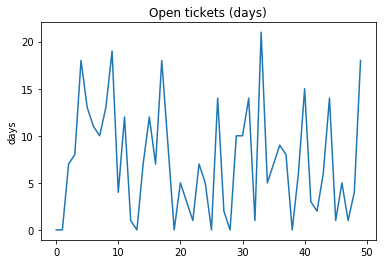

In [248]:
plt.plot(df['daysOpen'].sample(50).values)
plt.ylabel('days')
plt.title('Open tickets (days)')
plt.show()

In [249]:
statistics.mode(df['RequestorSeniority'])

'2 - Regular'

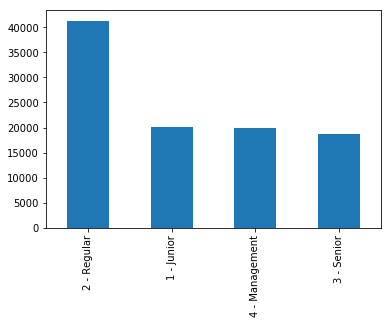

In [250]:
df['RequestorSeniority'].value_counts().plot.bar()
plt.show()

The graph above demonstrates the distribution of the requestor who opened the ticket with Support per their eniority in the company. Evidently, the majority of tickets is opened by ordinary employees. It can be explained by the fact that there're more regular employees than juniors, managers or senior employees, which resembles an ordinary company structure. From the graph we can see that number of open tickets by juniors, managers or senior employees is roughly equal. Every seniority level of the company is affected by issues / support related questions and is using this support channel. 

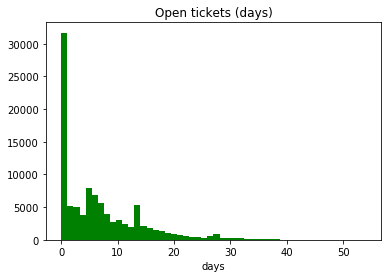

In [251]:
plt.hist(df['daysOpen'],bins = 50, color = 'green')
plt.title('Open tickets (days)')
plt.xlabel('days')
plt.show()

From the graph above we can see that there're over 30000 freshly opened tickets (on the day when the data was collected). If we assume that every day there're about 30000 new tickets, and the tickets are deleted from the database once being resolved, we can see that the majority of tickets are being resolved during the first day (compare the first bar and the second bar on histogram). There're two spikes of the number of tickets open for 5 and 12 days. Probably, a lot of users reported the same problem 5 and 12 days ago and it's still not fixed. It also can be a backlog which occured on non-working days and the team still didn't clear them completely.

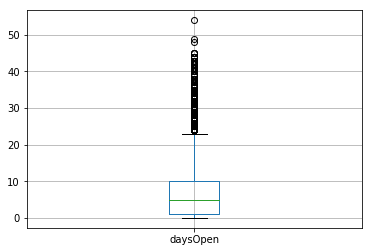

In [252]:
df.boxplot(column='daysOpen')
plt.show()

The boxplot suggests that the 75% of tickets are being resolved within 10 days. We can see some outstanding tickets open for more than ~23 days - they can be longstanding bugs that the team currently can't resolve or the priority for those issue are not high enough. There're 3 outstanding cases open for almost 50 days and longer. 

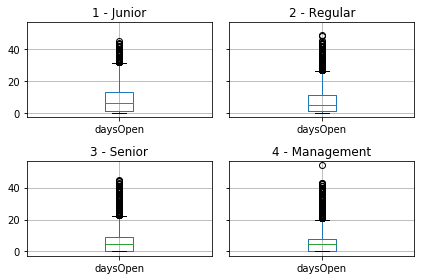

In [253]:
df.groupby('RequestorSeniority').boxplot(column='daysOpen')
plt.tight_layout()
plt.show()

The boxplots show that tickets submitted by Management are resolved faster (the variance between days open is less). Tickets submitted by junior take longer to solve. 

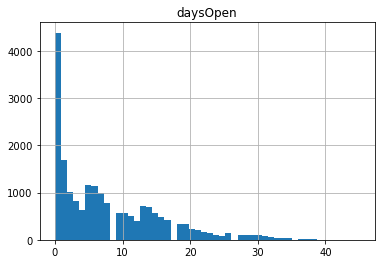

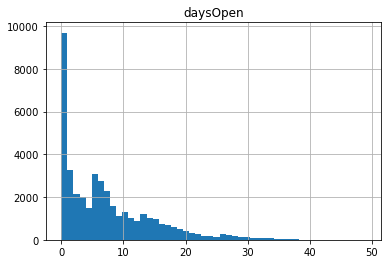

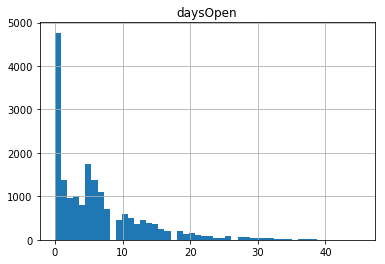

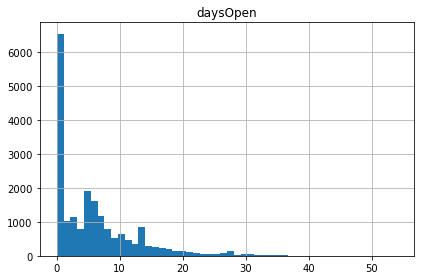

In [254]:
df.groupby('RequestorSeniority').hist(column='daysOpen', bins = 50)
plt.tight_layout()
plt.show()

[Couldn't solve how to put labels] 
If we infer that the first histogram is describing tickets submitted by the junior group, and the last one - management group: the juniors' tickets show seasonality, whereas management doesn't have this clear cycle. Every 9 days there's spike in junior's tickets. Also, 1 and 3 graphs show time when tickets are not submited at all every 9 days, which might be their day off. 